## Model Version 7

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()
# need to check (distribution extreme.. check after initial modeling) :  
#    dti, total_rec_late_fee, recoveries, tot_coll_amt, mths_since_rcnt_il, il_util, max_bal_bc, avg_cur_bal,
#    delinq_amnt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mths_since_recent_revol_delinq, tax_liens

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

### Extreme outlier

In [4]:
from sklearn.preprocessing import LabelEncoder
df_plot = df
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df_plot['loan_status'])
df_plot['loan_status'] = label_encoder.transform(df_plot['loan_status'])

shape of data(dti>=600) : (10, 80)


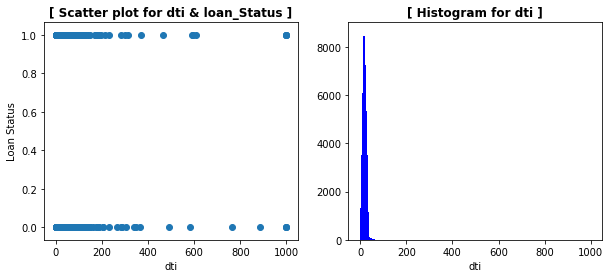

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

##### "dti" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ Scatter plot for dti & loan_Status ]', fontweight="bold")
plt.scatter('dti', 'loan_status', data=df_plot)
plt.xlabel('dti')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['dti'], bins=1000, color="blue")
plt.title('[ Histogram for dti ]', fontweight="bold")
plt.xlabel('dti')

df.dti.unique().shape
print('shape of data(dti>=600) :', df[df['dti'] >= 600].shape)

shape of data(total_rec_late_fee>=500) : (5, 80)


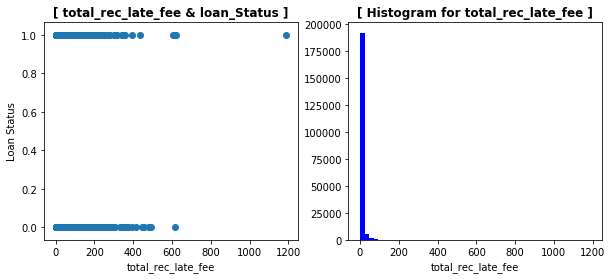

In [6]:
##### "total_rec_late_fee" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ total_rec_late_fee & loan_Status ]', fontweight="bold")
plt.scatter('total_rec_late_fee', 'loan_status', data=df_plot)
plt.xlabel('total_rec_late_fee')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['total_rec_late_fee'], bins=50, color="blue")
plt.title('[ Histogram for total_rec_late_fee ]', fontweight="bold")
plt.xlabel('total_rec_late_fee')

df.dti.unique().shape
print('shape of data(total_rec_late_fee>=500) :', df[df['total_rec_late_fee'] >= 500].shape)

shape of data(tot_coll_amt>=100000) : (6, 80)


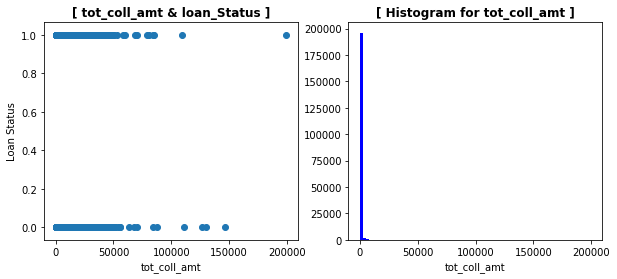

In [7]:
##### "tot_coll_amt" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ tot_coll_amt & loan_Status ]', fontweight="bold")
plt.scatter('tot_coll_amt', 'loan_status', data=df_plot)
plt.xlabel('tot_coll_amt')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['tot_coll_amt'], bins=80, color="blue")
plt.title('[ Histogram for tot_coll_amt ]', fontweight="bold")
plt.xlabel('tot_coll_amt')

df.dti.unique().shape
print('shape of data(tot_coll_amt>=100000) :', df[df['tot_coll_amt'] >= 100000].shape)

In [8]:
# outlier deletion :  dti (>=600, 10 counts)
print('before outlier(dti) removel : ', df.shape)
df = df[df['dti'] < 600]
print('after outlier(dti) removel : ', df.shape)

df = df[df['total_rec_late_fee'] < 500]
print('after outlier(total_rec_late_fee) removel : ', df.shape)

df = df[df['tot_coll_amt'] < 100000]
print('after outlier(tot_coll_amt) removel : ', df.shape)

before outlier(dti) removel :  (200000, 80)
after outlier(dti) removel :  (199990, 80)
after outlier(total_rec_late_fee) removel :  (199985, 80)
after outlier(tot_coll_amt) removel :  (199979, 80)


In [9]:
df = df.drop(['recoveries', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','total_pymnt'], axis=1) 

### 'State' delete (Too many categories & Not important)

In [10]:
df = df.drop(['addr_state'], axis=1)

### dummification for categorical variables

In [11]:
print(df.dtypes.value_counts())

int64      52
float64    13
object      9
dtype: int64


In [12]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [13]:
x = pd.get_dummies(x_old, drop_first=True)

## Modeling with Top 40 important Variables

In [14]:
## Top 40 variables
# addtional deletion : total_rec_int, total_rec_late_fee
top40_var = ['installment','loan_amnt','int_rate',
'term_ 60 months','annual_inc','mo_sin_old_rev_tl_op','sub_grade_num','dti','num_rev_tl_bal_gt_0','avg_cur_bal',
'total_rev_hi_lim','bc_open_to_buy','fico_range_mean','total_bc_limit','acc_open_past_24mths',
'home_ownership_RENT','tot_cur_bal','mort_acc','open_rv_24m',
             
'total_acc','grade_D','mths_since_recent_inq','max_bal_bc','revol_bal','mo_sin_old_il_acct','revol_util',
'bc_util','total_bal_il','mths_since_rcnt_il','open_acc_6m','il_util','mths_since_last_delinq',
'percent_bc_gt_75','inq_last_6mths','all_util','mths_since_recent_bc','verification_status_Verified',
'purpose_small_business','home_ownership_MORTGAGE', 'pct_tl_nvr_dlq']

In [15]:
x = x[top40_var]

### x,y split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [17]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.10f' % log.score(x_test, y_test))
print('** test pred (initial model) : ', 0.69)

training prediction accuracy :  0.65
test prediction accuracy :  0.6556905691
** test pred (initial model) :  0.69


In [18]:
## same logic (for checking)
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('logistic regression accuracy : %.10f' % accuracy_score(y_test, lr_pred))
print('** test pred (initial model) : ', 0.69)

logistic regression accuracy : 0.6556905691
** test pred (initial model) :  0.69


In [19]:
test_pred_prob = lr_log.predict_proba(x_test)
print(roc_auc_score(y_test, test_pred_prob[:,1]))
print('** test pred (initial model) : ', 0.747396965817424)

0.7111672272367257
** test pred (initial model) :  0.747396965817424


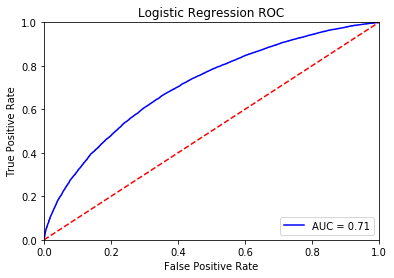

In [20]:
# calculate the fpr and tpr for all thresholds of the classification
lr_test_pred_prob = lr_log.predict_proba(x_test)
lr_preds = lr_test_pred_prob[:,1]
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(y_test, lr_preds)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
plt.title('Logistic Regression ROC')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sub_grade_num              0.051635
int_rate                   0.034364
acc_open_past_24mths       0.024816
num_rev_tl_bal_gt_0        0.018893
open_rv_24m                0.018343
dti                        0.016526
mort_acc                   0.012189
mths_since_recent_inq      0.009909
open_acc_6m                0.007792
total_acc                  0.006389
home_ownership_MORTGAGE    0.004167
home_ownership_RENT        0.004150
inq_last_6mths             0.003719
term_ 60 months            0.003069
mths_since_last_delinq     0.002683
fico_range_mean            0.002556
mths_since_rcnt_il         0.002137
installment                0.002063
grade_D                    0.001783
il_util                    0.001715
dtype: float64


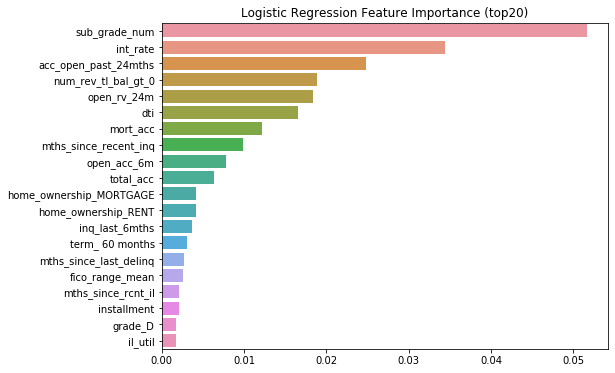

In [21]:
# visualize feature importance
lr_feature_imp = abs(lr_log.coef_)[0]
lr_feature_imp = pd.Series(lr_feature_imp, index=x_train.columns)
lr_feature_top20 = lr_feature_imp.sort_values(ascending=False)[:20]
lr_feature_top40_rf = lr_feature_imp.sort_values(ascending=False)[:40]

print(lr_feature_top20)

plt.figure(figsize=(8,6))
plt.title('Logistic Regression Feature Importance (top20)')
sns.barplot(x=lr_feature_top20, y=lr_feature_top20.index)
plt.show()

In [22]:
print(confusion_matrix(y_test, lr_pred))

[[10491  8110]
 [ 5661 15734]]


### 2. Random Forest

#### * Before Tuning

In [23]:
start_time = time.time()

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('RF running time : {0:.1f} seconds '.format(time.time()-start_time))

rf accuracy : 0.6469
** accuracy (initial model) :  0.6685
RF running time : 10.6 seconds 


#### * Hyper Parameter tuning 

In [23]:
start_time = time.time()

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [300],    
    'max_depth': [10],
    'min_samples_leaf': [18],
    'min_samples_split': [8],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

best parameter:
 {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 300, 'random_state': 1}
best prediction accuracy: 0.6573


In [24]:
### Re-excution with best params.. (12/10) ###
start_time = time.time()

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [300],    
    'max_depth': [10],
    'min_samples_leaf': [18],
    'min_samples_split': [8],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

best parameter:
 {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 300, 'random_state': 1}
best prediction accuracy: 0.6573


In [25]:
### prediction by best param (auto)
rf3_pred = rf_grid_cv.best_estimator_.predict(x_test)
gb_feature_imp = gb_grid_cv.best_estimator_.feature_importances_

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy (initial model) : ', 0.7011)
print('RF tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

rf3 accuracy : 0.6584
** accuracy (initial model) :  0.7011
RF tuning & running time : 1002.3 seconds 


In [48]:
### test with best param + n_estimators increase (Pre-determined params,...)
rf3_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=1)
rf3_clf.fit(x_train, y_train)
rf3_pred = rf3_clf.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy (initial model) : ', 0.7011)

KeyboardInterrupt: 

In [49]:
rf_test_pred_prob = rf_grid_cv.predict_proba(x_test)
print('rf ROC_AUC Score :', roc_auc_score(y_test, rf_test_pred_prob[:,1]))

rf ROC_AUC Score : 0.7156476433260486


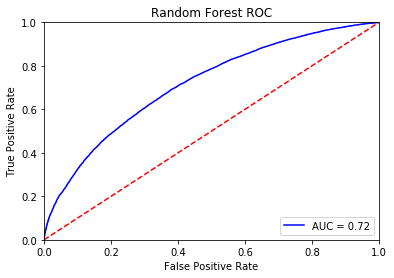

In [50]:
# calculate the fpr and tpr for all thresholds of the classification
rf_test_pred_prob = rf_grid_cv.predict_proba(x_test)
rf_preds = rf_test_pred_prob[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# method I: plt
plt.title('Random Forest ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sub_grade_num           0.251503
int_rate                0.197398
term_ 60 months         0.095942
fico_range_mean         0.045220
dti                     0.040691
avg_cur_bal             0.025149
loan_amnt               0.023303
grade_D                 0.022533
installment             0.021106
tot_cur_bal             0.019485
bc_open_to_buy          0.019101
acc_open_past_24mths    0.018658
annual_inc              0.017255
open_rv_24m             0.013667
mort_acc                0.011724
total_bc_limit          0.011139
mo_sin_old_rev_tl_op    0.010905
max_bal_bc              0.010466
all_util                0.009641
mths_since_recent_bc    0.009224
dtype: float64


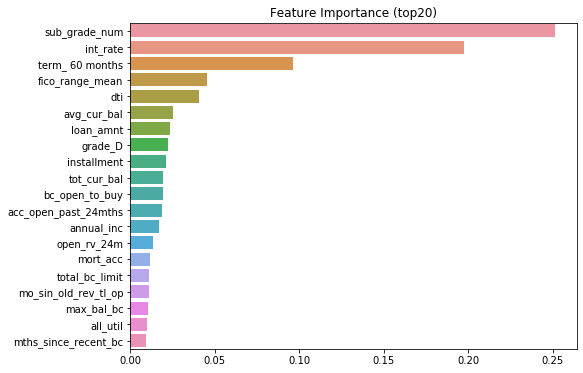

In [55]:
rf_feature_imp = rf_grid_cv.best_estimator_.feature_importances_
rf_feature_imp = pd.Series(rf_feature_imp, index=x_train.columns)
rf_feature_top20 = rf_feature_imp.sort_values(ascending=False)[:20]
rf_feature_top40_rf = rf_feature_imp.sort_values(ascending=False)[:40]

print(rf_feature_top20)

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=rf_feature_top20, y=rf_feature_top20.index)
plt.show()

In [56]:
print(confusion_matrix(y_test, rf3_pred))

[[11076  7525]
 [ 6149 15246]]


### 3. GBM

#### * Before Tuning

In [31]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('gbm accuracy : {0:.4f}'.format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('gbm running time : {0:.1f} seconds '.format(time.time()-start_time))

gbm accuracy : 0.6469
** accuracy (initial model) :  0.6685
gbm running time : 64.1 seconds 


#### * Hyper Parameter tuning

In [ ]:
start_time = time.time()

gb2_clf = GradientBoostingClassifier(random_state=1)
gb_params = {
    'n_estimators': [300],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12],
    'min_samples_split': [8,12],
    'learning_rate': [0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb2_clf, param_grid=gb_params, cv=10, verbose=1)
gb_grid_cv.fit(x_train, y_train)

print('best parameter:\n', gb_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
### test with best param 
gb3_pred = gb_grid_cv.best_estimator_.predict(x_test)
gb3_accuracy = accuracy_score(y_test, gb3_pred)

print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
print('GBM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

In [71]:
gb_test_pred_prob = gb_grid_cv.predict_proba(x_test)
print('GBM ROC_AUC Score :', roc_auc_score(y_test, gb_test_pred_prob[:,1]))

NameError: name 'gb_grid_cv' is not defined

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
GBM_test_pred_prob = gb_grid_cv.predict_proba(x_test)
GBM_preds = GBM_test_pred_prob[:,1]
GBM_fpr, GBM_tpr, GBM_threshold = metrics.roc_curve(y_test, GBM_preds)
GBM_roc_auc = metrics.auc(GBM_fpr, GBM_tpr)

# method I: plt
plt.title('GBM ROC')
plt.plot(GBM_fpr, GBM_tpr, 'b', label = 'AUC = %0.2f' % GBM_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
gb_feature_imp = gb_grid_cv.best_estimator_.feature_importances_
gb_feature_imp = pd.Series(gb_feature_imp, index=x_train.columns)
gb_feature_top20 = gb_feature_imp.sort_values(ascending=False)[:20]
gb_feature_top40 = gb_feature_imp.sort_values(ascending=False)[:40]
print(gb_feature_top20)

plt.figure(figsize=(8,6))
plt.title('gb_Feature Importance (top20)')
sns.barplot(x=gb_feature_top20, y=gb_feature_top20.index)
plt.show()

### 4. XGBoost

In [31]:
start_time = time.time()

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_xgb = label_encoder.transform(y_train)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test_xgb = label_encoder.transform(y_test)

In [32]:
dtrain = xgb.DMatrix(data=x_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=x_test, label=y_test_xgb)

In [33]:
xgb_params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 
              'early_stoppings':100}
num_rounds = 400

In [34]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.681963	eval-logloss:0.682177
[1]	train-logloss:0.672845	eval-logloss:0.673317
[2]	train-logloss:0.665436	eval-logloss:0.665994
[3]	train-logloss:0.659202	eval-logloss:0.659858
[4]	train-logloss:0.653969	eval-logloss:0.654843
[5]	train-logloss:0.649466	eval-logloss:0.650455
[6]	train-logloss:0.645808	eval-logloss:0.646882
[7]	train-logloss:0.642528	eval-logloss:0.643779
[8]	train-logloss:0.639796	eval-logloss:0.641133
[9]	train-logloss:0.637465	eval-logloss:0.63891
[10]	train-logloss:0.635391	eval-logloss:0.636948
[11]	train-logloss:0.633575	eval-logloss:0.635262
[12]	train-logloss:0.632062	eval-logloss:0.633789
[13]	train-logloss:0.630749	eval-logloss:0.632576
[14]	train-logloss:0.62955	eval-logloss:0.631436
[15]	train-logloss:0.628467	eval-logloss:0.630459
[16]	train-logloss:0.627384	eval-logloss:0.629461
[17]	train-logloss:0.626408	eval-logloss:0.628571
[18]	train-logloss:0.625649	eval-logloss:0.627858
[19]	train-logloss:0.624859	eval-logloss:0.627173
[20]	train-l

[164]	train-logloss:0.604796	eval-logloss:0.610705
[165]	train-logloss:0.604744	eval-logloss:0.610689
[166]	train-logloss:0.6047	eval-logloss:0.610679
[167]	train-logloss:0.604664	eval-logloss:0.610665
[168]	train-logloss:0.604631	eval-logloss:0.610653
[169]	train-logloss:0.604584	eval-logloss:0.610618
[170]	train-logloss:0.604527	eval-logloss:0.610603
[171]	train-logloss:0.604498	eval-logloss:0.610588
[172]	train-logloss:0.604441	eval-logloss:0.610538
[173]	train-logloss:0.60439	eval-logloss:0.610504
[174]	train-logloss:0.604349	eval-logloss:0.610479
[175]	train-logloss:0.604301	eval-logloss:0.610473
[176]	train-logloss:0.604251	eval-logloss:0.610443
[177]	train-logloss:0.604204	eval-logloss:0.610414
[178]	train-logloss:0.604166	eval-logloss:0.610386
[179]	train-logloss:0.604119	eval-logloss:0.610361
[180]	train-logloss:0.604084	eval-logloss:0.610335
[181]	train-logloss:0.604034	eval-logloss:0.61029
[182]	train-logloss:0.603977	eval-logloss:0.610253
[183]	train-logloss:0.603919	eval-l

[326]	train-logloss:0.598933	eval-logloss:0.608474
[327]	train-logloss:0.598899	eval-logloss:0.60848
[328]	train-logloss:0.598868	eval-logloss:0.608462
[329]	train-logloss:0.598839	eval-logloss:0.608463
[330]	train-logloss:0.59881	eval-logloss:0.608467
[331]	train-logloss:0.598778	eval-logloss:0.608457
[332]	train-logloss:0.598756	eval-logloss:0.608458
[333]	train-logloss:0.598726	eval-logloss:0.608442
[334]	train-logloss:0.598695	eval-logloss:0.608433
[335]	train-logloss:0.598665	eval-logloss:0.608432
[336]	train-logloss:0.598645	eval-logloss:0.608432
[337]	train-logloss:0.59862	eval-logloss:0.608426
[338]	train-logloss:0.598595	eval-logloss:0.608407
[339]	train-logloss:0.598566	eval-logloss:0.608384
[340]	train-logloss:0.598526	eval-logloss:0.608374
[341]	train-logloss:0.598488	eval-logloss:0.608379
[342]	train-logloss:0.598454	eval-logloss:0.608352
[343]	train-logloss:0.59842	eval-logloss:0.608341
[344]	train-logloss:0.59839	eval-logloss:0.608349
[345]	train-logloss:0.598353	eval-lo

In [35]:
pred_probs = xgb_model.predict(dtest)
xgb_preds = [1 if x>0.5 else 0 for x in pred_probs]

In [36]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test_xgb, pred)
    accuracy = accuracy_score(y_test_xgb , pred)
    precision = precision_score(y_test_xgb , pred)
    recall = recall_score(y_test_xgb , pred)
    print('confusion matrix')
    print(confusion)
    print('XGBoost Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [57]:
get_clf_eval(y_test_xgb, xgb_preds)
print('** accuracy (initial model) : ', 'Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045')
print('XGBoost running time : {0:.1f} seconds '.format(time.time()-start_time))

confusion matrix
[[11331  7270]
 [ 6106 15289]]
XGBoost Accuracy: 0.6656, Precision: 0.6777, Recall: 0.7146
** accuracy (initial model) :  Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045
XGBoost running time : 10080.9 seconds 


In [71]:
xgb_model.get_score(importance_type='weight')

{'sub_grade_num': 103,
 'int_rate': 191,
 'term_ 60 months': 67,
 'avg_cur_bal': 101,
 'loan_amnt': 118,
 'installment': 110,
 'dti': 130,
 'fico_range_mean': 59,
 'mort_acc': 36,
 'home_ownership_MORTGAGE': 8,
 'open_rv_24m': 38,
 'annual_inc': 141,
 'acc_open_past_24mths': 66,
 'home_ownership_RENT': 24,
 'num_rev_tl_bal_gt_0': 80,
 'max_bal_bc': 72,
 'mths_since_recent_inq': 51,
 'total_bc_limit': 59,
 'il_util': 78,
 'verification_status_Verified': 24,
 'mo_sin_old_rev_tl_op': 131,
 'total_acc': 94,
 'mths_since_recent_bc': 68,
 'tot_cur_bal': 51,
 'bc_open_to_buy': 52,
 'open_acc_6m': 30,
 'mths_since_last_delinq': 81,
 'purpose_small_business': 20,
 'mo_sin_old_il_acct': 83,
 'total_bal_il': 74,
 'all_util': 56,
 'revol_bal': 108,
 'total_rev_hi_lim': 71,
 'bc_util': 75,
 'inq_last_6mths': 30,
 'mths_since_rcnt_il': 64,
 'percent_bc_gt_75': 25,
 'revol_util': 49,
 'pct_tl_nvr_dlq': 43}

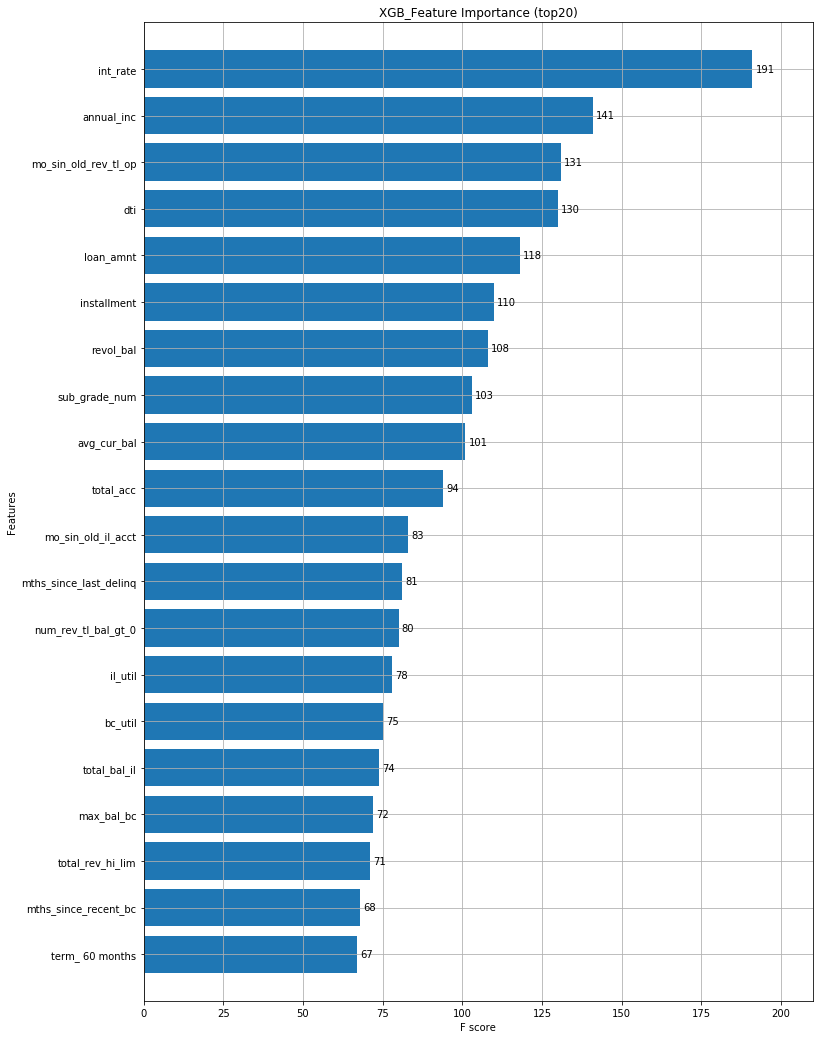

In [39]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb_model, max_num_features=20, height=0.8, ax=ax)
plt.title('XGB_Feature Importance (top20)')
plt.show()


int_rate                  191.0
annual_inc                141.0
mo_sin_old_rev_tl_op      131.0
dti                       130.0
loan_amnt                 118.0
installment               110.0
revol_bal                 108.0
sub_grade_num             103.0
avg_cur_bal               101.0
total_acc                  94.0
mo_sin_old_il_acct         83.0
mths_since_last_delinq     81.0
num_rev_tl_bal_gt_0        80.0
il_util                    78.0
bc_util                    75.0
total_bal_il               74.0
max_bal_bc                 72.0
total_rev_hi_lim           71.0
mths_since_recent_bc       68.0
term_ 60 months            67.0
dtype: float64


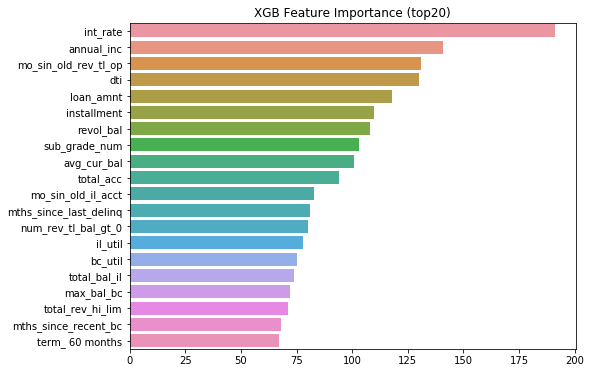

In [75]:
xgb_feature_imp = xgb_model.get_score(importance_type='weight')
xgb_feature_imp = pd.Series(xgb_feature_imp, index=x_train.columns)
xgb_feature_imp_top20 = xgb_feature_imp.sort_values(ascending=False)[:20]
xgb_feature_imp_top40 = xgb_feature_imp.sort_values(ascending=False)[:40]

print(xgb_feature_imp_top20)

plt.figure(figsize=(8,6))
plt.title('XGB Feature Importance (top20)')
sns.barplot(x=xgb_feature_imp_top20, y=xgb_feature_imp_top20.index)
plt.show()

In [40]:
print(confusion_matrix(y_test, xgb_preds))

[[11331  7270]
 [ 6106 15289]]


In [66]:
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_preds)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)
xgb_roc_auc

0.661883507106136

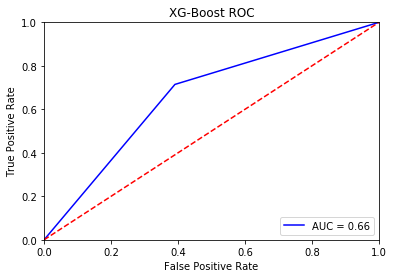

In [67]:
# calculate the fpr and tpr for all thresholds of the classification
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_preds)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

# method I: plt
plt.title('XG-Boost ROC')
plt.plot(xgb_fpr, xgb_tpr, 'b', label = 'AUC = %0.2f' % xgb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. SVM (SVC)

In [ ]:
start_time = time.time()

n_estimators = 10
svm_clf = LinearSVC(random_state=1)
svm_clf.fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)

print('SVM train score : {0:.1f} seconds ', svm_clf.score(x_train, y_train))
print('SVM pred test score : {0:.1f} seconds ', svm_clf.score(x_test, y_test))

#### * Hyper Parameter tuning

In [41]:
start_time = time.time()

svm2_clf = LinearSVC(random_state=1)
svm_params = {'C': [1, 10, 100]}

# GridSearchCV
svm_grid_cv = GridSearchCV(svm2_clf, param_grid=svm_params, cv=5)
svm_grid_cv.fit(x_train,y_train)
svm2_pred = svm_grid_cv.predict(x_test)

print('SVM best parameter:\n', svm_grid_cv.best_params_)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('SVM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

SVM best parameter:
 {'C': 1}
SVM best prediction accuracy: 0.5302
SVM best prediction for test accuracy: 0.5569
SVM tuning & running time : 438.7 seconds 


In [43]:
# svm_test_pred_prob = svm_grid_cv.predict_proba(x_test)
# print('SVM ROC_AUC Score :', roc_auc_score(y_test, svm_test_pred_prob[:,1]))

In [84]:
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm2_pred)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)
svm_roc_auc

0.5349755500056732

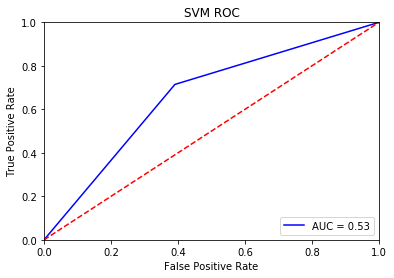

In [85]:
# calculate the fpr and tpr for all thresholds of the classification
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm2_pred)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

# method I: plt
plt.title('SVM ROC')
plt.plot(xgb_fpr, xgb_tpr, 'b', label = 'AUC = %0.2f' % svm_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                               0       abs
sub_grade_num          -0.015821  0.015821
int_rate               -0.011796  0.011796
dti                    -0.005750  0.005750
mths_since_recent_inq   0.005346  0.005346
acc_open_past_24mths   -0.004304  0.004304
open_rv_24m            -0.003219  0.003219
pct_tl_nvr_dlq         -0.002073  0.002073
num_rev_tl_bal_gt_0    -0.001904  0.001904
open_acc_6m            -0.001289  0.001289
mths_since_rcnt_il     -0.001136  0.001136
installment             0.001091  0.001091
il_util                -0.001050  0.001050
fico_range_mean         0.001047  0.001047
mths_since_last_delinq  0.001031  0.001031
mths_since_recent_bc    0.000968  0.000968
percent_bc_gt_75       -0.000886  0.000886
inq_last_6mths         -0.000868  0.000868
mort_acc                0.000840  0.000840
all_util               -0.000655  0.000655
total_acc               0.000649  0.000649


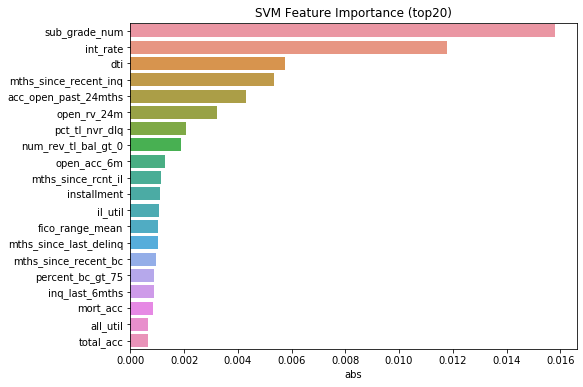

In [44]:
svm_feature_imp = pd.DataFrame(svm_grid_cv.best_estimator_.coef_, columns=x_train.columns).transpose()
svm_feature_imp['abs']=svm_feature_imp[0].apply(np.abs).round(6)
svm_feature_top20 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:20]
svm_feature_top40 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:40]

print(svm_feature_top20)

plt.figure(figsize=(8,6))
plt.title('SVM Feature Importance (top20)')
sns.barplot(x=svm_feature_top20['abs'], y=svm_feature_top20.index)
plt.show()

In [86]:
print(confusion_matrix(y_test, svm2_pred))

[[ 4125 14476]
 [ 3248 18147]]


### 6. naive_bayes (GaussianNB)

In [45]:
start_time = time.time()

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
gnb_pred = gnb_clf.predict(x_test)

# Evaluate accuracy
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
print('Naive_bayes running time : {0:.1f} seconds '.format(time.time()-start_time))

naive_bayes prediction accuracy: : {0:.4f} 0.5844084408440844
Naive_bayes running time : 0.3 seconds 


In [87]:
gnb_test_pred_prob = gnb_clf.predict_proba(x_test)
print('GBN ROC_AUC Score :', roc_auc_score(y_test, gnb_test_pred_prob[:,1]))

GBN ROC_AUC Score : 0.6606561445664547


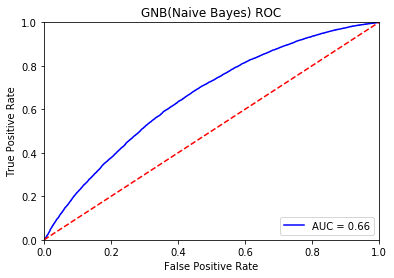

In [88]:
# calculate the fpr and tpr for all thresholds of the classification
gnb_test_pred_prob = gnb_clf.predict_proba(x_test)
gnb_preds = gnb_test_pred_prob[:,1]
gnb_fpr, gnb_tpr, gnb_threshold = metrics.roc_curve(y_test, gnb_preds)
gnb_roc_auc = metrics.auc(gnb_fpr, gnb_tpr)

# method I: plt
plt.title('GNB(Naive Bayes) ROC')
plt.plot(gnb_fpr, gnb_tpr, 'b', label = 'AUC = %0.2f' % gnb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
print(confusion_matrix(y_test, gnb_pred))

[[14270  4331]
 [12291  9104]]


### 7. Neural Net (Simple ver.)

In [46]:
start_time = time.time()

NN_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN_clf.fit(x_train, y_train)
NN_clf_pred = NN_clf.predict(x_test)

# Evaluate accuracy
print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y_train), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN_clf_pred))
print('Neural Net running time : {0:.1f} seconds '.format(time.time()-start_time))

NN Score prediction accuracy: : {0:.4f} 0.4604
NN test prediction accuracy: : {0:.4f} 0.46507150715071505
Neural Net running time : 0.7 seconds 


#### * Hyper Parameter tuning

In [99]:
start_time = time.time()

NN2_clf = MLPClassifier(max_iter=100)
NN2_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

NN2_grid_cv = GridSearchCV(NN2_clf, param_grid=NN2_params, cv=5)
NN2_grid_cv.fit(x_train,y_train)
NN2_pred = NN2_grid_cv.predict(x_test)

print('Neural Net best parameter:\n', NN2_grid_cv.best_params_)
print('Neural Net best prediction accuracy: {0:.4f}'.format(NN2_grid_cv.best_score_))
print('Neural Net best prediction (test accuracy) : {0:.4f}' .format(accuracy_score(y_test, NN2_pred)))
print('Neural Net  tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

Neural Net best parameter:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Net best prediction accuracy: 0.6040
Neural Net best prediction (test accuracy) : 0.4690
Neural Net  tuning & running time : 16502.8 seconds 


In [100]:
nn_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
print('NN ROC_AUC Score :', roc_auc_score(y_test, nn_test_pred_prob[:,1]))

NN ROC_AUC Score : 0.5798524227030641


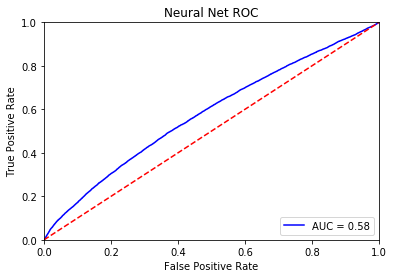

In [101]:
# calculate the fpr and tpr for all thresholds of the classification
NN_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
NN_preds = NN_test_pred_prob[:,1]
NN_fpr, NN_tpr, NN_threshold = metrics.roc_curve(y_test, NN_preds)
NN_roc_auc = metrics.auc(NN_fpr, NN_tpr)

# method I: plt
plt.title('Neural Net ROC')
plt.plot(NN_fpr, NN_tpr, 'b', label = 'AUC = %0.2f' % NN_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [262]:
print(confusion_matrix(y_test, NN2_pred))


[[18506    95]
 [21144   251]]


In [212]:
NN_coefs = NN2_grid_cv.best_estimator_.coefs_[1].transpose()
nn_feature_imp = pd.DataFrame(NN_coefs[0], index=x_train.columns)
nn_feature_imp



ValueError: Shape of passed values is (100, 1), indices imply (40, 1)

In [ ]:
print('RF\n', feature_top40_rf,'\n')
print('GBM\n', gb_feature_top40,'\n')
print('XGB\n', xgb_model.get_score(importance_type='weight'), '\n')
print('SVM', svm_feature_top40,'\n')
# print('NN\n', NN_feature_imp_top40,'\n')

In [ ]:
print('logistic regression accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
get_clf_eval(y_test_xgb, xgb_preds)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: : {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
#print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN2_pred))

In [ ]:
import dill
dill.dump_session('session_model_v7.db')  ## Save

# import dill
# dill.load_session('session_model_v4.db')  ## Restore